<a href="https://colab.research.google.com/github/SchulzeEdi/ProjetosIA/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*PRÉ-PROCESSAMENTO*

#**Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IPM/LengthOfStay.csv',
                    sep=',', encoding='utf-8')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import plotly.express as px

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Analise de dados

In [ ]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/12,0,F,0,0,0,0,0,0,...,192.476918,12,1.390722,30.432418,96,6.5,4,9/1/12,B,3
1,2,5/26/12,5+,F,0,0,0,0,0,0,...,94.078507,8,0.943164,28.460516,61,6.5,1,6/2/12,A,7
2,3,9/22/12,1,F,0,0,0,0,0,0,...,130.530524,12,1.065750,28.843812,64,6.5,2,9/25/12,B,3
3,4,8/9/12,0,F,0,0,0,0,0,0,...,163.377028,12,0.906862,27.959007,76,6.5,1,8/10/12,A,1
4,5,12/20/12,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/12,E,4


In [ ]:
hist1 =  px.histogram (df,  x = "rcount", nbins=60)
hist1.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist1.show()

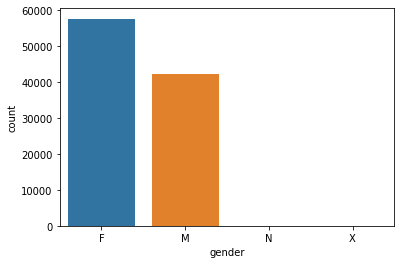

In [ ]:
sns.countplot(x='gender', data=df);

In [ ]:
df['gender'].value_counts()

F    57643
M    42355
N        1
X        1
Name: gender, dtype: int64

In [ ]:
df = df.loc[df.gender != 'N']
df = df.loc[df.gender != 'X']

In [ ]:
df['gender'].value_counts()

F    57643
M    42355
Name: gender, dtype: int64

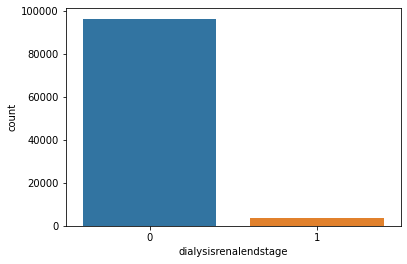

In [ ]:
sns.countplot(x='dialysisrenalendstage', data=df);

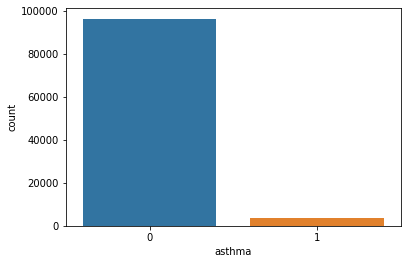

In [ ]:
sns.countplot(x='asthma', data=df);

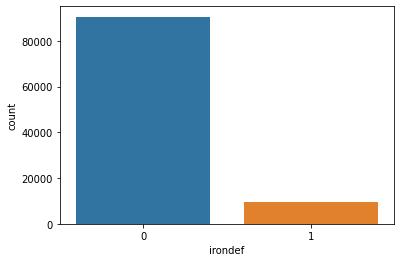

In [ ]:
sns.countplot(x='irondef', data=df);

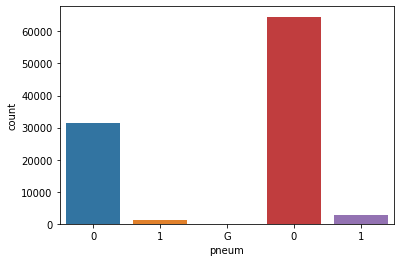

In [ ]:
sns.countplot(x='pneum', data=df);

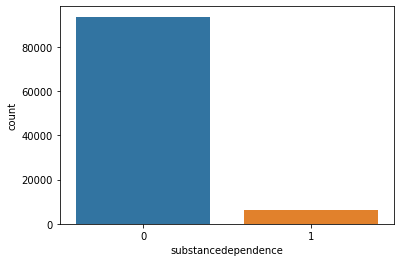

In [ ]:
sns.countplot(x='substancedependence', data=df);

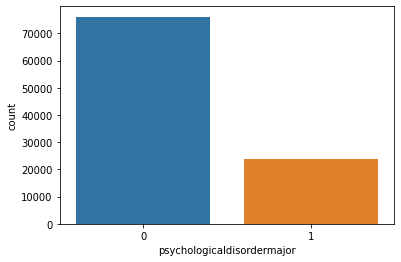

In [ ]:
sns.countplot(x='psychologicaldisordermajor', data=df);

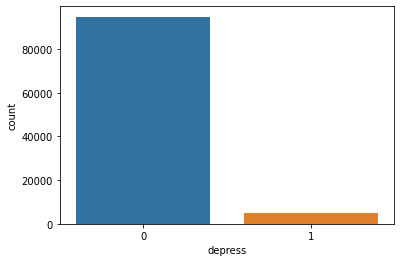

In [ ]:
sns.countplot(x='depress', data=df);

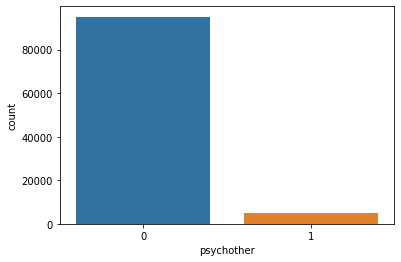

In [ ]:
sns.countplot(x='psychother', data=df);

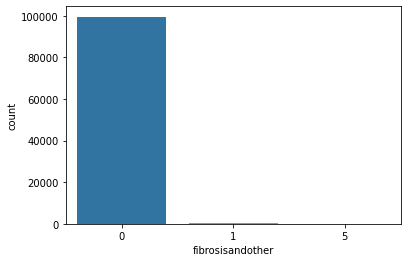

In [ ]:
sns.countplot(x='fibrosisandother', data=df);

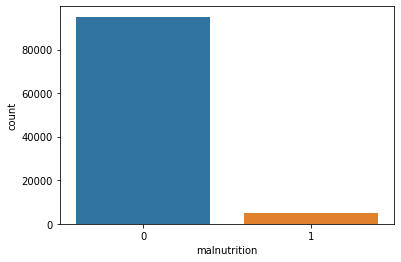

In [ ]:
sns.countplot(x='malnutrition', data=df);

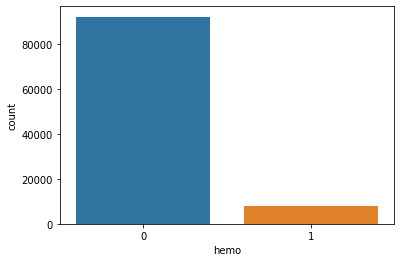

In [ ]:
sns.countplot(x='hemo', data=df);

In [ ]:
hist1 =  px.histogram (df,  x = "hematocrit", nbins=60)
hist1.update_layout(width=600,height=400,title_text='Hematocrito')
hist1.show()

In [ ]:
px.box(df, y='hematocrit')

In [ ]:
hist1 =  px.histogram (df,  x = "neutrophils", nbins=60)
hist1.update_layout(width=600,height=400,title_text='Nreutrofilo')
hist1.show()

In [ ]:
px.box(df, y='neutrophils')

#**Transformacao de variaveis**

In [ ]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/12,0,F,0,0,0,0,0,0,...,192.476918,12,1.390722,30.432418,96,6.5,4,9/1/12,B,3
1,2,5/26/12,5+,F,0,0,0,0,0,0,...,94.078507,8,0.943164,28.460516,61,6.5,1,6/2/12,A,7
2,3,9/22/12,1,F,0,0,0,0,0,0,...,130.530524,12,1.065750,28.843812,64,6.5,2,9/25/12,B,3
3,4,8/9/12,0,F,0,0,0,0,0,0,...,163.377028,12,0.906862,27.959007,76,6.5,1,8/10/12,A,1
4,5,12/20/12,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/12,E,4


In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
df2.dtypes

eid                             int64
vdate                          object
rcount                         object
gender                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                          object
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                     object
neutrophils                   float64
sodium                         object
glucose                       float64
bloodureanitro                 object
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
discharged                     object
facid       

In [ ]:
previsores = df.iloc[:, 0:28].values
previsores[:,17]

array(['140.3611318', '136.7316918', '133.0585135', ..., 136.6959051,
       135.9805162, 140.9501374], dtype=object)

In [ ]:
#Convertido para string primeiramente pois estava com dados em modo STR e INT
previsores[:,7] = previsores[:,7].astype(str)
previsores[:,15] = previsores[:,15].astype(str)
previsores[:,17] = previsores[:,17].astype(str)
previsores[:,19] = previsores[:,19].astype(str)
previsores[:,25] = previsores[:,25].astype(str)
previsores[:,26] = previsores[:,26].astype(str)

In [ ]:
#Convertido todas as colunas para inteiro
previsores[:,1] = LabelEncoder().fit_transform(previsores[:,1])
previsores[:,2] = LabelEncoder().fit_transform(previsores[:,2])
previsores[:,3] = LabelEncoder().fit_transform(previsores[:,3])
previsores[:,7] = LabelEncoder().fit_transform(previsores[:,7])
previsores[:,15] = LabelEncoder().fit_transform(previsores[:,15])
previsores[:,17] = LabelEncoder().fit_transform(previsores[:,17])
previsores[:,19] = LabelEncoder().fit_transform(previsores[:,19])
previsores[:,25] = LabelEncoder().fit_transform(previsores[:,25])
previsores[:,26] = LabelEncoder().fit_transform(previsores[:,26])

In [ ]:
previsores[:,26]

array([1, 0, 1, ..., 2, 1, 1], dtype=object)

In [ ]:
previsoresDummy = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [26])],
                                remainder='passthrough').fit_transform(previsores)

In [ ]:
previsoresDummydf = pd.DataFrame(previsoresDummy)

In [ ]:
previsoresdf = pd.DataFrame(previsores)

In [ ]:
previsoresdf.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,327,0,0,0,0,0,0,0,0,...,192.476918,28,1.390722,30.432418,96,6.5,4,348,1,3
1,2,232,5,0,0,0,0,0,0,0,...,94.078507,332,0.943164,28.460516,61,6.5,1,267,0,7
2,3,351,1,0,0,0,0,0,0,0,...,130.530524,28,1.06575,28.843812,64,6.5,2,365,1,3
3,4,336,0,0,0,0,0,0,0,0,...,163.377028,28,0.906862,27.959007,76,6.5,1,318,0,1
4,5,105,0,0,0,0,0,1,0,1,...,94.886654,24,1.242854,30.258927,67,5.6,2,120,4,4


#Tratamento de dados

In [ ]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/12,0,F,0,0,0,0,0,0,...,192.476918,12,1.390722,30.432418,96,6.5,4,9/1/12,B,3
1,2,5/26/12,5+,F,0,0,0,0,0,0,...,94.078507,8,0.943164,28.460516,61,6.5,1,6/2/12,A,7
2,3,9/22/12,1,F,0,0,0,0,0,0,...,130.530524,12,1.065750,28.843812,64,6.5,2,9/25/12,B,3
3,4,8/9/12,0,F,0,0,0,0,0,0,...,163.377028,12,0.906862,27.959007,76,6.5,1,8/10/12,A,1
4,5,12/20/12,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/12,E,4


In [ ]:
#Carrega os dados nulos das colunas
previsoresDummydf.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    3
25    0
26    0
27    2
28    0
29    1
30    0
31    0
32    0
dtype: int64

In [ ]:
#Transforma os dados nulos da coluna na media de dados desta mesma coluna
previsoresDummydf[24].fillna(previsoresDummydf[24].mean(), inplace=True)
previsoresDummydf[27].fillna(previsoresDummydf[27].mean(), inplace=True)
previsoresDummydf[29].fillna(previsoresDummydf[29].mean(), inplace=True)

In [ ]:
previsoresDummydf[30]

0        4
1        1
2        2
3        1
4        2
        ..
99993    1
99994    1
99995    1
99996    1
99997    4
Name: 30, Length: 99998, dtype: object

#PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
previsores_pca = pca.fit_transform(previsoresDummydf)

In [ ]:
previsores_pca.shape

(99998, 3)

In [ ]:
previsores_pca

array([[ 5.75257972e+04, -7.98634955e+03, -2.10171978e+02],
       [ 2.98383555e+04, -4.28136899e+04, -8.54112442e+01],
       [ 1.13669528e+04, -6.60478938e+04, -2.38544108e+02],
       ...,
       [-4.87195680e+04,  1.90576007e+04, -1.55299909e+02],
       [-5.39369638e+04,  1.24960817e+04,  1.08070583e+02],
       [-1.75839205e+04,  5.82273918e+04,  1.65768197e+00]])

In [ ]:
pca.explained_variance_ratio_

array([5.01412607e-01, 4.98560005e-01, 1.31528898e-05])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9999857655211549

#Base de treino e teste

In [ ]:
alvo = df.iloc[:, 27].values

In [ ]:
alvo

array([3, 7, 3, ..., 4, 4, 2])

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsoresDummydf, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

(69998, 33)

In [ ]:
x_teste.shape

(30000, 33)

In [ ]:
y_treino.shape

(69998,)

In [ ]:
y_teste.shape

(30000,)

#NAIVE BAYES

In [ ]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

In [ ]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([4, 7, 4, ..., 1, 6, 7])

In [ ]:
y_teste

array([4, 7, 4, ..., 1, 6, 8])

In [ ]:
#Acurácia do algoritmo em relação a 0 = 0% e 1 = 100%
accuracy_score(y_teste, previsoes_naive)

0.7313666666666667

In [ ]:
#Elevando para porcentagem o resultado da acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 73.14%


In [ ]:
confusion_matrix(y_teste, previsoes_naive)

array([[4865,  434,   17,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0],
       [1978, 1637,  169,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0],
       [   0, 1138, 3689,   14,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,  554, 3953,    4,    0,    0,    0,    1,    3,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1020, 2656,    5,    0,    0,    0,    5,    0,
           0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,  427, 2668,    0,    6,    0,    2,    0,
           0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,  444, 1712,   19,    1,    4,    0,
           0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,  804,  520,    2,    1,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0

In [ ]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80      5317
           2       0.51      0.43      0.47      3785
           3       0.83      0.76      0.80      4842
           4       0.79      0.88      0.83      4515
           5       0.86      0.72      0.78      3687
           6       0.86      0.86      0.86      3104
           7       0.68      0.78      0.73      2181
           8       0.48      0.39      0.43      1327
           9       0.31      0.20      0.24       679
          10       0.21      0.08      0.12       326
          11       0.57      0.41      0.48       145
          12       0.41      0.19      0.26        48
          13       0.35      0.27      0.31        22
          14       0.50      0.15      0.24        13
          15       0.29      0.33      0.31         6
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1

    accuracy              

In [ ]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([5, 1, 5, ..., 4, 9, 6])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.7350924312123204

### **Validação Cruzada**

In [ ]:
#Validação cruzada feita para garantia de que não ocorra overfitting

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsoresDummydf, alvo, cv = kfold)
resultado

array([0.72105579, 0.72345531, 0.73965207, 0.70665867, 0.73305339,
       0.72165567, 0.72615477, 0.73065387, 0.72127213, 0.72817282,
       0.72817282, 0.73477348, 0.72907291, 0.72457246, 0.72127213,
       0.72007201, 0.74107411, 0.72277228, 0.72577258, 0.73057306,
       0.74257426, 0.72967297, 0.72067207, 0.7389739 , 0.7269727 ,
       0.73147315, 0.729973  , 0.72847285, 0.72547255, 0.73027303])

In [ ]:
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 72.78%


#KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=17, p=1)

In [ ]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

In [ ]:
y_teste

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_knn)

In [ ]:
print(classification_report(y_teste, previsoes_knn))

In [ ]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsoresDummydf, alvo, cv = kfold)

In [ ]:
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))